In [103]:
import caiman as cm 
from caiman.motion_correction import MotionCorrect
from caiman.source_extraction.cnmf.params import CNMFParams
import numpy as np
import matplotlib.pyplot as plt

# Motion Correction with CaImAn

## Rigid Motion Correction

Learning Outcomes

1. Playing movies
2. Setting parameters
3. How to do rigid motion correction
4. Memory mapped file
5. Comparing summary images

In [27]:
# 2photon
filename = "../data/Sue_2x_3000_40_-46.tif"
raw_data_2p = cm.load(filename)
cm.play_movie(raw_data_2p, plot_text=True) # too noisy (salt and pepper noise) 
# how many frames did you see?

In [28]:
# let's downsample in time (factor of 5 which is 1/0.2). Every 5 frames will be combined to average out the salt & pepper noise 
filename = "../data/Sue_2x_3000_40_-46.tif"
raw_data_2p = cm.load(filename)
raw_resize = raw_data_2p.copy()
raw_resize.resize(fz=0.2).play(plot_text=True, fr=10) # change fr (framerate) to control speed of playback
# how many frames did you see? Is the number what you expected?

In [29]:
raw_data_2p.shape
# 3000 frames of 170 x 170 images

(3000, 170, 170)

In [30]:
# 1photon
filename = "../data/data_endoscope.tif"
raw_data_1p = cm.load(filename)
cm.play_movie(raw_data_1p, plot_text=True) # noisy 
# how many frames did you see?

In [31]:
# let's downsample in time (factor of 5 which is 1/0.2). Every 5 frames will be combined to average out the salt & pepper noise 
filename = "../data/data_endoscope.tif"
raw_data_1p = cm.load(filename)
raw_resize = raw_data_1p.copy()
raw_resize.resize(fz=0.2).play(plot_text=True, fr=10) # change fr (framerate) to control speed of playback
# how many frames did you see? Is the number what you expected?

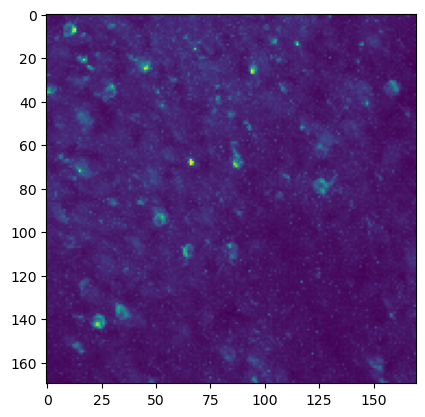

In [35]:
# maximum projection 2p
max_proj_2p = np.max(raw_data_2p, axis=0)
plt.imshow(max_proj_2p)

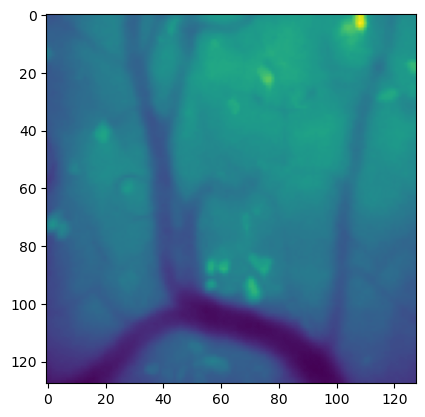

In [36]:
# maximum projection 1p
max_proj_1p = np.max(raw_data_1p, axis=0)
plt.imshow(max_proj_1p)

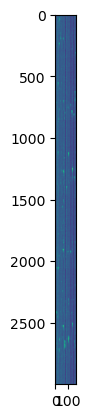

In [37]:
# correlation image 2p
corr_img_2p = cm.local_correlations(raw_data_2p)
plt.imshow(corr_img_2p) # looks weird

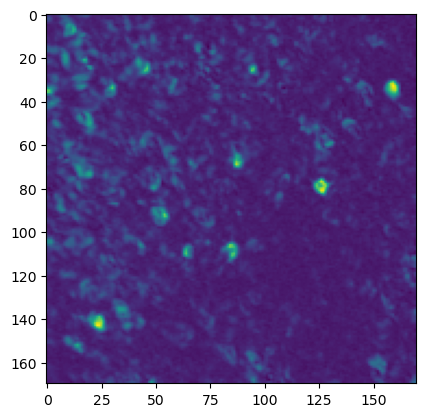

In [38]:
# correlation image 2p
corr_img_2p = cm.local_correlations(raw_data_2p, swap_dim=False)
plt.imshow(corr_img_2p) # now it's okay. local_correlations automatically thinks that time is listed in Y axis which is not true in our case

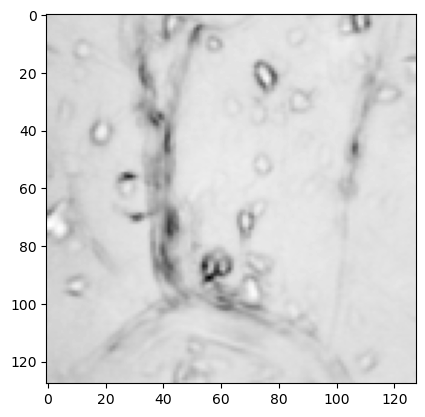

In [40]:
# correlation image 1p
corr_img_1p = cm.local_correlations(raw_data_1p, swap_dim=False)
plt.imshow(corr_img_1p, cmap='gray') 

In [84]:
# 2p motion correction
filename = "../data/Sue_2x_3000_40_-46.tif"
fnames = [filename]
mc_rigid = MotionCorrect(
    fname = fnames,
    pw_rigid = False
)
mc_rigid.motion_correct(save_movie=True)

mc_rigid_2p = cm.load(mc_rigid.fname_tot_rig)
mc_rigid_resize = mc_rigid_2p.copy()
mc_rigid_resize.resize(fz=0.01).play(plot_text=True, fr=30)

c:\Users\sangeetha\anaconda3\envs\caiman\lib\site-packages\caiman\motion_correction.py:3118: RuntimeWarning: Mean of empty slice
  new_temp = np.nanmean(mc, 0)
100%|██████████| 1/1 [00:00<00:00,  1.88it/s]


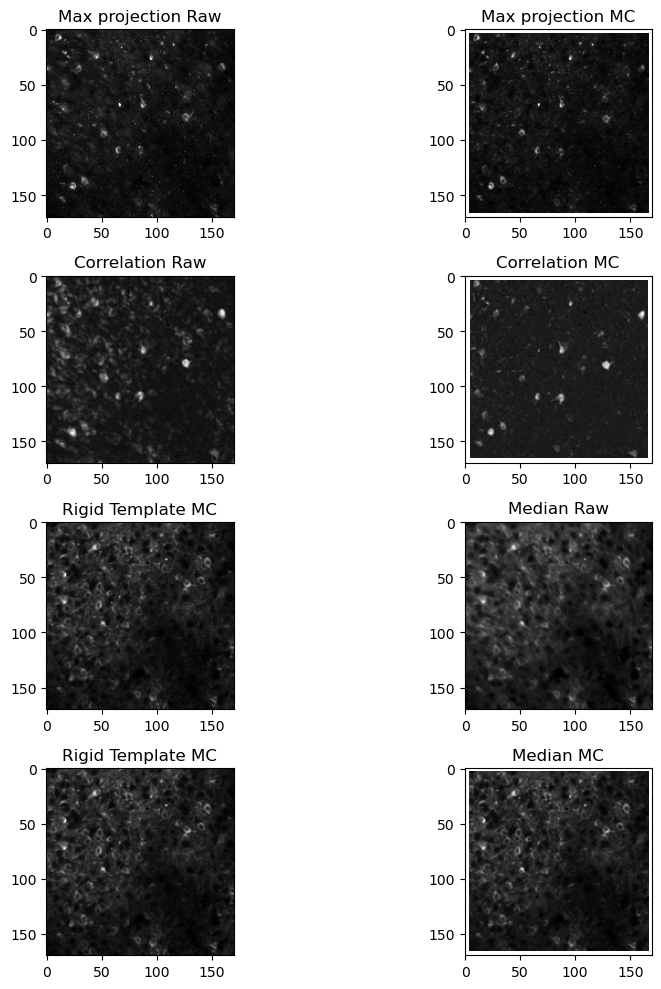

In [85]:
# compare summary images of motion corrected and raw
fig = plt.figure(figsize=(10,10))

plt.subplot(4,2,1)
plt.imshow(np.max(raw_data_2p,axis=0), cmap='gray')
plt.title("Max projection Raw")

plt.subplot(4,2,2)
plt.imshow(np.max(mc_rigid_2p,axis=0), cmap='gray')
plt.title("Max projection MC")

plt.subplot(4,2,3)
plt.imshow(cm.local_correlations(raw_data_2p, swap_dim=False), cmap='gray')
plt.title("Correlation Raw")

plt.subplot(4,2,4)
plt.imshow(cm.local_correlations(mc_rigid_2p, swap_dim=False), cmap='gray')
plt.title("Correlation MC")

plt.subplot(4,2,5)
plt.imshow(mc.total_template_rig, cmap='gray')
plt.title("Rigid Template MC")

plt.subplot(4,2,6)
plt.imshow(np.median(raw_data_2p, axis=0), cmap='gray')
plt.title("Median Raw")

plt.subplot(4,2,7)
plt.imshow(mc.total_template_rig, cmap='gray')
plt.title("Rigid Template MC")

plt.subplot(4,2,8)
plt.imshow(np.median(mc_rigid_2p, axis=0), cmap='gray')
plt.title("Median MC")

plt.tight_layout() # do you notice that there are no pixels in borders of motion corrected image?

# median image of motion corrected image looks sharper than the median image of raw data

In [88]:
# 2p motion correction
filename = "../data/Sue_2x_3000_40_-46.tif"
fnames = [filename]
mc_rigid = MotionCorrect(
    fname = fnames,
    pw_rigid = False,
    border_nan="copy"
)
mc_rigid.motion_correct(save_movie=True)

mc_rigid_2p = cm.load(mc_rigid.fname_tot_rig)
mc_rigid_resize = mc_rigid_2p.copy()
mc_rigid_resize.resize(fz=0.01).play(plot_text=True, fr=30)

100%|██████████| 1/1 [00:00<00:00,  2.45it/s]


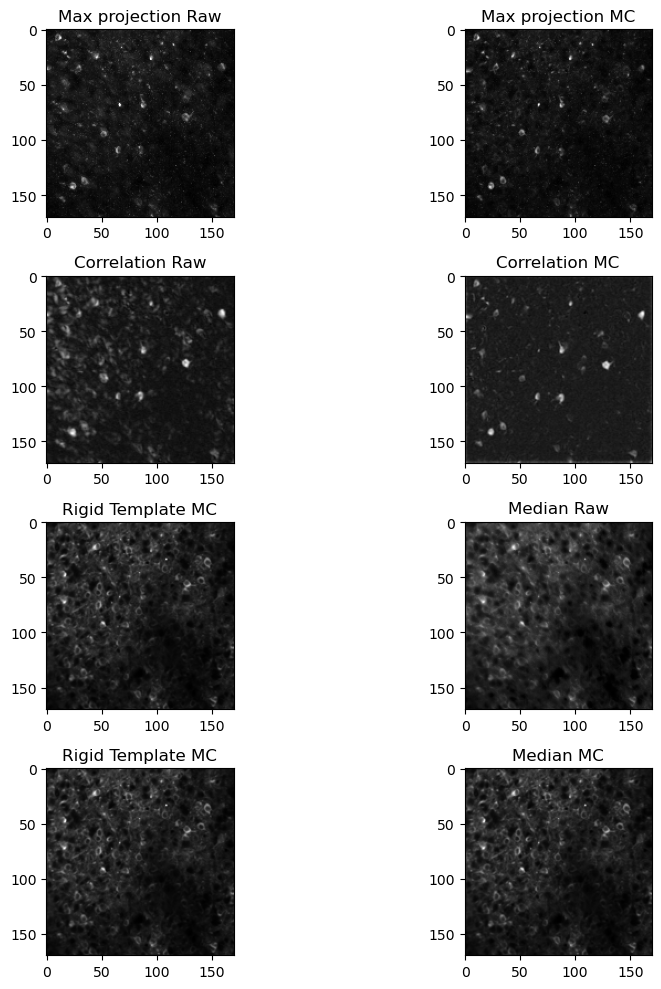

In [87]:
# compare summary images of motion corrected and raw
fig = plt.figure(figsize=(10,10))

plt.subplot(4,2,1)
plt.imshow(np.max(raw_data_2p,axis=0), cmap='gray')
plt.title("Max projection Raw")

plt.subplot(4,2,2)
plt.imshow(np.max(mc_rigid_2p,axis=0), cmap='gray')
plt.title("Max projection MC")

plt.subplot(4,2,3)
plt.imshow(cm.local_correlations(raw_data_2p, swap_dim=False), cmap='gray')
plt.title("Correlation Raw")

plt.subplot(4,2,4)
plt.imshow(cm.local_correlations(mc_rigid_2p, swap_dim=False), cmap='gray')
plt.title("Correlation MC")

plt.subplot(4,2,5)
plt.imshow(mc.total_template_rig, cmap='gray')
plt.title("Rigid Template MC")

plt.subplot(4,2,6)
plt.imshow(np.median(raw_data_2p, axis=0), cmap='gray')
plt.title("Median Raw")

plt.subplot(4,2,7)
plt.imshow(mc.total_template_rig, cmap='gray')
plt.title("Rigid Template MC")

plt.subplot(4,2,8)
plt.imshow(np.median(mc_rigid_2p, axis=0), cmap='gray')
plt.title("Median MC")

plt.tight_layout() # okay, we have no nans in borders!

## Piece-wise Rigid Motion Correction

In [89]:
# 2p motion correction
filename = "../data/Sue_2x_3000_40_-46.tif"
fnames = [filename]
mc_pw_rigid = MotionCorrect(
    fname = fnames,
    pw_rigid = True
)
mc_pw_rigid.motion_correct(save_movie=True)

mc_pw_rigid_2p = cm.load(mc_pw_rigid.fname_tot_els)
mc_rigid_resize = mc_rigid_2p.copy()
mc_rigid_resize.resize(fz=0.01).play(plot_text=True, fr=10)

100%|██████████| 1/1 [00:00<00:00,  2.58it/s]


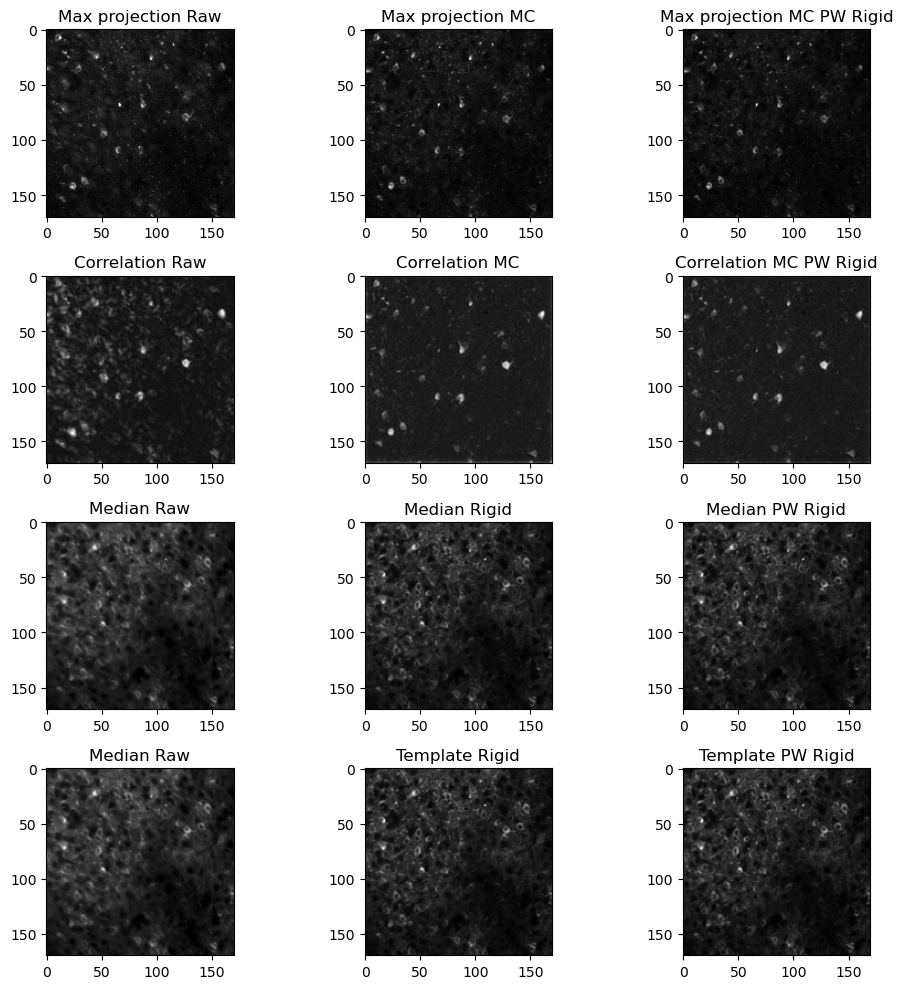

In [91]:
# compare summary images of motion corrected and raw
fig = plt.figure(figsize=(10,10))

plt.subplot(4,3,1)
plt.imshow(np.max(raw_data_2p,axis=0), cmap='gray')
plt.title("Max projection Raw")

plt.subplot(4,3,2)
plt.imshow(np.max(mc_rigid_2p,axis=0), cmap='gray')
plt.title("Max projection MC")

plt.subplot(4,3,3)
plt.imshow(np.max(mc_pw_rigid_2p,axis=0), cmap='gray')
plt.title("Max projection MC PW Rigid")

plt.subplot(4,3,4)
plt.imshow(cm.local_correlations(raw_data_2p, swap_dim=False), cmap='gray')
plt.title("Correlation Raw")

plt.subplot(4,3,5)
plt.imshow(cm.local_correlations(mc_rigid_2p, swap_dim=False), cmap='gray')
plt.title("Correlation MC")

plt.subplot(4,3,6)
plt.imshow(cm.local_correlations(mc_pw_rigid_2p, swap_dim=False), cmap='gray')
plt.title("Correlation MC PW Rigid")

plt.subplot(4,3,7)
plt.imshow(np.median(raw_data_2p, axis=0), cmap='gray')
plt.title("Median Raw")

plt.subplot(4,3,8)
plt.imshow(np.median(mc_rigid_2p, axis=0), cmap='gray')
plt.title("Median Rigid")

plt.subplot(4,3,9)
plt.imshow(np.median(mc_pw_rigid_2p, axis=0), cmap='gray')
plt.title("Median PW Rigid")

plt.subplot(4,3,10)
plt.imshow(np.median(raw_data_2p, axis=0), cmap='gray')
plt.title("Median Raw")

plt.subplot(4,3,11)
plt.imshow(mc_rigid.total_template_rig, cmap='gray')
plt.title("Template Rigid")

plt.subplot(4,3,12)
plt.imshow(mc_pw_rigid.total_template_els, cmap='gray')
plt.title("Template PW Rigid")

plt.tight_layout() # okay, we have no nans in borders!

In [95]:
(mc_rigid_2p == mc_pw_rigid_2p).all() # so not all values are true

movie(False)

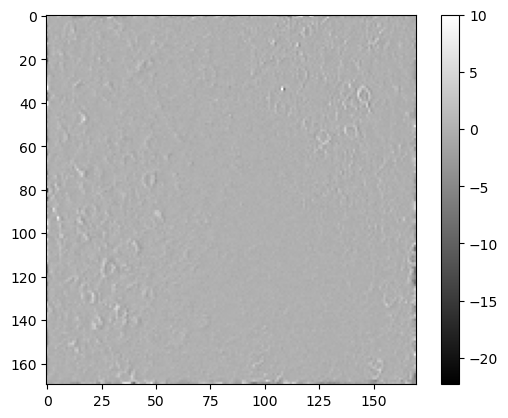

In [102]:
plt.imshow(np.median(mc_pw_rigid_2p, axis=0) - np.median(mc_rigid_2p, axis=0), cmap='gray', vmax=10)
plt.colorbar()

## Using `Params` object for Piece-wise Rigid motion correction

In [104]:
params = CNMFParams()
params # what do you see? Can you comment about the structure of `params`?

CNMFParams:

data:

{'caiman_version': '1.9.16',
 'decay_time': 0.4,
 'dims': None,
 'dxy': (1, 1),
 'fnames': None,
 'fr': 30,
 'last_commit': 'GITW-a7fa26d631c0af5c5ddc2b0bc0df8b74ade02b9b',
 'mmap_C': None,
 'mmap_F': None,
 'var_name_hdf5': 'mov'}

spatial_params:

{'block_size_spat': 5000,
 'dist': 3,
 'expandCore': array([[0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0]]),
 'extract_cc': True,
 'maxthr': 0.1,
 'medw': None,
 'method_exp': 'dilate',
 'method_ls': 'lasso_lars',
 'n_pixels_per_process': None,
 'nb': 1,
 'normalize_yyt_one': True,
 'nrgthr': 0.9999,
 'num_blocks_per_run_spat': 20,
 'se': None,
 'ss': None,
 'thr_method': 'nrg',
 'update_background_components': True}

temporal_params:

{'ITER': 2,
 'bas_nonneg': False,
 'block_size_temp': 5000,
 'fudge_factor': 0.96,
 'lags': 5,
 'memory_efficient': False,
 'method_deconvolution': 'oasis',
 'nb': 1,
 'noise_method': 'mean',
 'noise_range': [0.25, 0.5],
 'n

In [105]:
# let's zoom into motion correction parameters
params.motion

{'border_nan': 'copy',
 'gSig_filt': None,
 'is3D': False,
 'max_deviation_rigid': 3,
 'max_shifts': (6, 6),
 'min_mov': None,
 'niter_rig': 1,
 'nonneg_movie': True,
 'num_frames_split': 80,
 'num_splits_to_process_els': None,
 'num_splits_to_process_rig': None,
 'overlaps': (32, 32),
 'pw_rigid': False,
 'shifts_opencv': True,
 'splits_els': 14,
 'splits_rig': 14,
 'strides': (96, 96),
 'upsample_factor_grid': 4,
 'use_cuda': False,
 'indices': (slice(None, None, None), slice(None, None, None))}

In [106]:
# for piece-wise rigid motion, 
motion_params = {
    'strides': (48, 48),
    'overlaps': (24, 24),
    'max_shifts': (6, 6),
    'max_deviation_rigid': 3,
    'pw_rigid': True
}
params.motion.update(
    motion_params
)
params.motion # all parameters are updated

{'border_nan': 'copy',
 'gSig_filt': None,
 'is3D': False,
 'max_deviation_rigid': 3,
 'max_shifts': (6, 6),
 'min_mov': None,
 'niter_rig': 1,
 'nonneg_movie': True,
 'num_frames_split': 80,
 'num_splits_to_process_els': None,
 'num_splits_to_process_rig': None,
 'overlaps': (24, 24),
 'pw_rigid': True,
 'shifts_opencv': True,
 'splits_els': 14,
 'splits_rig': 14,
 'strides': (48, 48),
 'upsample_factor_grid': 4,
 'use_cuda': False,
 'indices': (slice(None, None, None), slice(None, None, None))}

In [108]:
filename = "../data/Sue_2x_3000_40_-46.tif"
fnames = [filename]
mc = MotionCorrect(fnames, **params.motion)
mc.motion_correct(save_movie=True)
mc.mmap_file, mc.fname_tot_els

(['../data\\Sue_2x_3000_40_-46_els__d1_170_d2_170_d3_1_order_F_frames_3000.mmap'],
 ['../data\\Sue_2x_3000_40_-46_els__d1_170_d2_170_d3_1_order_F_frames_3000.mmap'])

## What else can we do with the `MotionCorrect` object? 

In [111]:
# visualizing shifts for rigid motion correction
params = CNMFParams() 
motion_params = {
    'pw_rigid': False
}
params.motion.update(
    motion_params
)

filename = "../data/Sue_2x_3000_40_-46.tif"
fnames = [filename]

mc_rigid = MotionCorrect(fnames, **params.motion)
mc_rigid.motion_correct(save_movie=True)

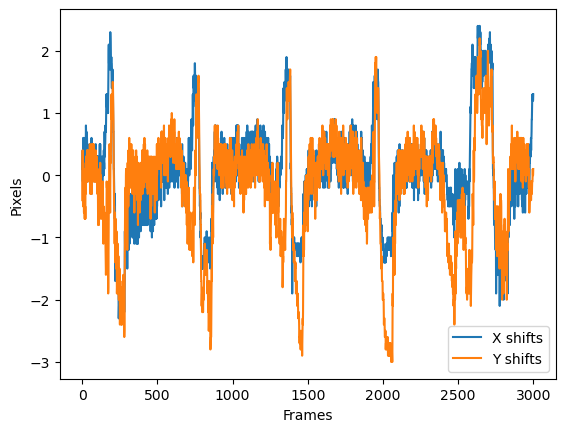

In [120]:
shifts = mc_rigid.shifts_rig
plt.plot(shifts)
plt.xlabel('Frames')
plt.ylabel('Pixels')
plt.legend(['X shifts','Y shifts'])

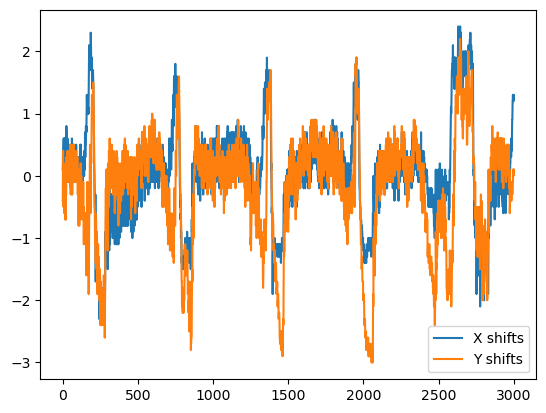

In [119]:
x_shift = [shift[0] for shift in shifts]
y_shift = [shift[1] for shift in shifts]

plt.plot(x_shift, label='X shifts')
plt.plot(y_shift, label='Y shifts')

plt.legend()